Do you want to plot 3D graphs for this univariate regression? It might take time to render. Y/n: y
Thank you for using this algorithm!


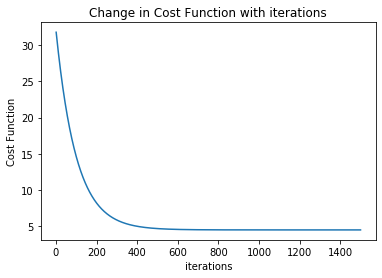

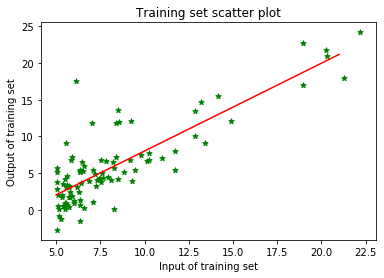

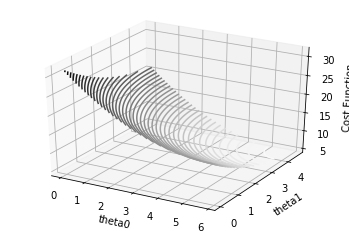

In [154]:
# the program assumes that the file containing the training set does not have any headings for columns and
# has the y column as the last column. 

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

def featureNormalization(lines,m):
    flag = True
    mu = [1]
    sigma = [0]
    sum = [1]
    tempsum = 0
    X = []
    y = []
    X_orig = []
    
    for line in lines:
        Xy = [1]+line.split(",")
        y.append(float((Xy[-1]).strip()))
                           
        for i in range(len(Xy)-1):
            if(flag == True):
                sum.append(0)
                X.append([])
                X_orig.append([])
            sum[i] = sum[i] + float(Xy[i])
            X[i].append(float(Xy[i]))
            X_orig[i].append(float(Xy[i]))
        flag = False
    
    for i in range(1,len(Xy)-1):
        mu.append(0)        
        mu[i] = sum[i]/m

    for x in X[1:]:
        mean = mu[X.index(x)]
        for i in range(m):
            x[i] = x[i] - mean
            tempsum = tempsum + x[i]**2/m
        sigma.append(tempsum**0.5)
            
    for x in X[1:]:
        s = sigma[X.index(x)]
        for i in range(m):
            x[i] = x[i]/s
    #print(X,y)  
    #print(len(X), len(X[0]), len(y))
    return (X,y,X_orig,mu,sigma)
  
    
def costFunction(X, y, theta):
        
    sum = 0
    for j in range(len(y)):
        prediction = 0
        for i in range(len(theta)):
            prediction = prediction + theta[i]*X[i][j]
        errorsqr = (prediction - y[j])**2
        sum = sum + errorsqr
    J = sum/(2*m)
    #print(J)
    return(J)   

def GradientDescent(X,y,theta,alpha,iterations):
    J_Vals = []
    theta_list = []
    m = len(y)
    
    for n_iter in range(iterations):
        theta_new = []
        delta = []
        for k in range(len(theta)):
            sum = 0
            for j in range(len(y)):
                prediction = 0
                for i in range(len(theta)):
                    prediction = prediction + theta[i]*X[i][j]

                error = (prediction - y[j])*X[k][j]
                sum = sum + error
            delta.append(sum/(2*m))
                        
        for j in range(len(theta)):
            theta_new.append(theta[j] - alpha*delta[j])
        
        theta_list.append(theta_new)
        theta = theta_new
        J = costFunction(X, y, theta)
        J_Vals.append(J)
        
    return (J_Vals,theta_list,theta)

def predict(X_pred,theta):
    prediction = 0
    
    for i in range(len(theta)):
        prediction = prediction + theta[i]*X_pred[i]
    return prediction;

def plot_graphs(J_Vals, theta_list, theta, X_orig, y):
    plt.figure(1)
    x_axis = range(1,iterations+1)
    plt.plot(x_axis, J_Vals)
    plt.xlabel('iterations')
    plt.ylabel('Cost Function')
    plt.title('Change in Cost Function with iterations')
    #display(plt.figure(1))
    
    if len(theta) == 2:
        user = input("Do you want to plot 3D graphs for this univariate regression? It might take time to render. Y/n: ")
        if user.lower() == 'y':
            plt.figure(2)
            # plotting points as a scatter plot
            plt.scatter(X_orig[1], y, label= "stars", color= "green", marker= "*", s=30)

            # x-axis label
            plt.xlabel('Input of training set')
            # frequency label
            plt.ylabel('Output of training set')
            # plot title
            plt.title('Training set scatter plot')
            # showing legend
            CFx = range(int(min(X_orig[1])),int(max(X_orig[1])))
            CFy = []
            for i in CFx:
                prediction = 0
                i = (i - mu[1])/sigma[1]
                Cx = [1, i]
                for a in range(len(theta)):
                    prediction = prediction + theta[a]*Cx[a]
                CFy.append(prediction)
            plt.plot(CFx, CFy, color = "red")

            theta0 = []
            theta1 = []
            for i in range(len(theta_list)):
                theta0.append(theta_list[i][0])
                theta1.append(theta_list[i][1])
            plt.figure(3)
            ax = plt.axes(projection='3d')

            t0, t1 = np.meshgrid(theta0, theta1)
            Z = costFunction(X, y, [t0,t1])
            ax.contour3D(t0, t1, Z, 50, cmap='binary')
            ax.set_xlabel('theta0')
            ax.set_ylabel('theta1')
            ax.set_zlabel('Cost Function');

            #plt.figure(4)
            #ax.plot_surface(t0, t1, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
            #ax.set_title('surface');
            print("Thank you for using this algorithm!")
        else:
            print("Thank you for using this algorithm!")
        
        
with open('ex1data1.txt','r') as f:
    lines = f.readlines()
    m = (len(lines)) # Size of Training set
    firstline = lines[0].split(",")
    num_columns = len(firstline) # X and y
    
    X,y,X_orig,mu,sigma = featureNormalization(lines,m)
    
theta = []
for i in range(num_columns):
    theta.append(0)
J = costFunction(X, y, theta)

alpha = 0.01
iterations = 1500
J_Vals, theta_list, theta = GradientDescent(X,y,theta,alpha,iterations) 
plot_graphs(J_Vals, theta_list, theta, X_orig, y)
#print(predict([1, 3.5],theta))
#print(mu,sigma)